In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [218]:
#read csv file from online github 
df2 = 'https://raw.githubusercontent.com/leningschulich/schulich_data_science/main/sales_data.csv'
df = pd.read_csv(df2)
df

,Product,Region,Price,Units Sold,Sale Date
0,NaN,Region_6,75.96,10.0,2022-01-01
1,NaN,Region_1,175.78,8.0,2022-01-02
2,Product_46,Region_3,20.43,12.0,2022-01-03
3,Product_36,Region_1,12.77,10.0,2022-01-04
4,Product_17,Region_6,125.69,6.0,2022-01-05
...,...,...,...,...,...
1045,Product_45,Region_7,78.69,8.0,2022-07-28
1046,Product_1,Region_6,NaN,8.0,2022-08-02
1047,Product_17,Region_2,114.37,11.0,2023-12-18
1048,NaN,Region_8,NaN,5.0,2023-12-27


In [219]:
df.info() # understanding our DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     947 non-null    object 
 1   Region      946 non-null    object 
 2   Price       945 non-null    float64
 3   Units Sold  946 non-null    float64
 4   Sale Date   1050 non-null   object 
dtypes: float64(2), object(3)
memory usage: 41.1+ KB


In [220]:
df.describe(include = 'all')
#we can see there are 50 types of product and 10 unique regions.

,Product,Region,Price,Units Sold,Sale Date
count,947,946,945.000000,946.000000,1050
unique,50,10,NaN,NaN,1000
top,Product_5,Region_9,NaN,NaN,2023-10-09
freq,28,109,NaN,NaN,2
mean,NaN,NaN,107.598688,10.048626,NaN
std,NaN,NaN,124.020322,3.172261,NaN
min,NaN,NaN,0.200000,2.000000,NaN
25%,NaN,NaN,29.430000,8.000000,NaN
50%,NaN,NaN,78.130000,10.000000,NaN
75%,NaN,NaN,142.570000,12.000000,NaN


In [221]:
df[df['Product'].isnull()]
#we can delete these rows as product column has value of NaN

,Product,Region,Price,Units Sold,Sale Date
0,NaN,Region_6,75.96,10.0,2022-01-01
1,NaN,Region_1,175.78,8.0,2022-01-02
18,NaN,NaN,276.27,9.0,2022-01-19
21,NaN,NaN,46.10,14.0,2022-01-22
27,NaN,Region_10,193.85,10.0,2022-01-28
...,...,...,...,...,...
995,NaN,Region_7,31.83,13.0,2024-09-22
997,NaN,Region_7,311.80,13.0,2024-09-24
1021,NaN,Region_2,108.89,7.0,2023-05-22
1024,NaN,Region_7,99.98,8.0,2023-07-21


In [222]:
df[df['Region'].isnull()]
#we can delete these rows as Region column has value of NaN

,Product,Region,Price,Units Sold,Sale Date
18,NaN,NaN,276.27,9.0,2022-01-19
21,NaN,NaN,46.10,14.0,2022-01-22
43,Product_35,NaN,112.27,4.0,2022-02-13
54,Product_12,NaN,96.49,16.0,2022-02-24
57,NaN,NaN,30.71,12.0,2022-02-27
...,...,...,...,...,...
996,Product_36,NaN,46.19,9.0,2024-09-23
1005,Product_15,NaN,59.91,NaN,2022-05-17
1017,Product_1,NaN,110.06,9.0,2023-12-11
1034,Product_39,NaN,29.22,10.0,2024-07-07


In [223]:
df.drop(df[df['Product'].isnull()].index,axis =0,inplace=True)# drop rows  
df.drop(df[df['Region'].isnull()].index,axis =0,inplace=True)# drop rows  

In [224]:
print(df['Units Sold'].mean(),df['Units Sold'].median())

10.090791180285343 10.0


We can find that the mean value and the median value of Units Sold are almost the same, thus we now decide to fill in the null value with a specified mean value

In [225]:
df['Units Sold'] = df['Units Sold'].fillna(df['Units Sold'].mean())
df['Units Sold']

2       12.0
3       10.0
4        6.0
5       11.0
6        6.0
        ... 
1044     6.0
1045     8.0
1046     8.0
1047    11.0
1049     8.0
Name: Units Sold, Length: 853, dtype: float64

In [226]:
print(df['Price'].mean(),df['Price'].median())

108.62498691099475 78.41


We can find that the mean and median value are not close to each other, thus we drop null value in Price column.

In [227]:
df.drop(df[df['Price'].isnull()].index,axis =0,inplace=True)# drop rows  

In [228]:
df.info()# we now have 764 rows and all of them have a value

<class 'pandas.core.frame.DataFrame'>
Int64Index: 764 entries, 2 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     764 non-null    object 
 1   Region      764 non-null    object 
 2   Price       764 non-null    float64
 3   Units Sold  764 non-null    float64
 4   Sale Date   764 non-null    object 
dtypes: float64(2), object(3)
memory usage: 35.8+ KB


In [229]:
df.drop_duplicates(inplace=True) #We need to drop rows with all values are the same
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 725 entries, 2 to 999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     725 non-null    object 
 1   Region      725 non-null    object 
 2   Price       725 non-null    float64
 3   Units Sold  725 non-null    float64
 4   Sale Date   725 non-null    object 
dtypes: float64(2), object(3)
memory usage: 34.0+ KB


Next, to further know the performance of various products and regions, we add a new column to df which called revenue

In [230]:
df['revenue'] = df['Price']*df['Units Sold']
df['revenue']

2       245.160000
3       127.700000
4       754.140000
5        94.930000
6       142.380000
          ...     
988    2431.577951
993    2184.670000
994     666.680000
998     651.600000
999     341.700000
Name: revenue, Length: 725, dtype: float64

In [231]:
df

,Product,Region,Price,Units Sold,Sale Date,revenue
2,Product_46,Region_3,20.43,12.000000,2022-01-03,245.160000
3,Product_36,Region_1,12.77,10.000000,2022-01-04,127.700000
4,Product_17,Region_6,125.69,6.000000,2022-01-05,754.140000
5,Product_45,Region_1,8.63,11.000000,2022-01-06,94.930000
6,Product_31,Region_3,23.73,6.000000,2022-01-07,142.380000
...,...,...,...,...,...,...
988,Product_42,Region_9,240.97,10.090791,2024-09-15,2431.577951
993,Product_7,Region_9,128.51,17.000000,2024-09-20,2184.670000
994,Product_1,Region_4,95.24,7.000000,2024-09-21,666.680000
998,Product_2,Region_10,43.44,15.000000,2024-09-25,651.600000


<AxesSubplot:xlabel='Region', ylabel='revenue'>

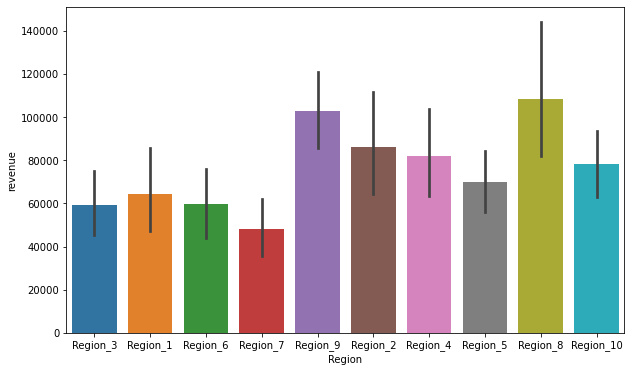

In [232]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Region',y='revenue',data=df,estimator=sum)

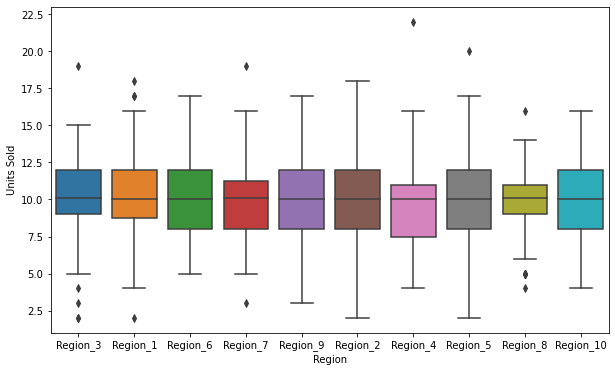

In [237]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y = 'Units Sold', x = 'Region')
plt.show()

In [243]:
region_9 = df.loc[df['Region']=='Region_9']
region_2 = df.loc[df['Region']=='Region_2']
region_4 = df.loc[df['Region']=='Region_4']
region_8 = df.loc[df['Region']=='Region_8']
region_10 = df.loc[df['Region']=='Region_10']

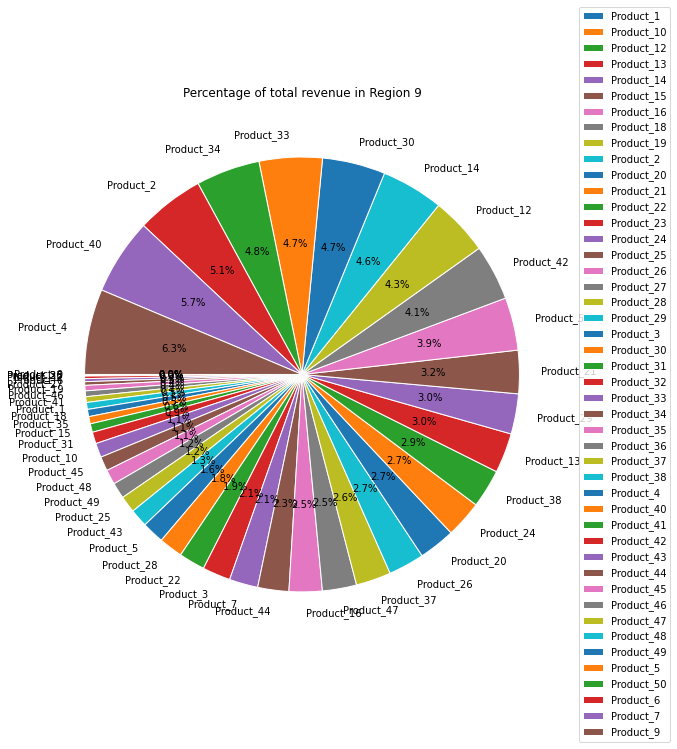

In [250]:
Total_revenue_9 = region_9.groupby('Product')['revenue'].sum()
Total_revenue_9
plt.figure(figsize=(16, 10), facecolor='white')
plt.pie((Total_revenue_9.sort_values()).values,labels=(Total_revenue_9.sort_values()).index, 
        autopct='%0.1f%%', startangle=180,wedgeprops={'linewidth': 1, 'edgecolor': 'white'})
plt.legend(labels=Total_revenue_9.index, loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Percentage of total revenue in Region 9')
plt.show()

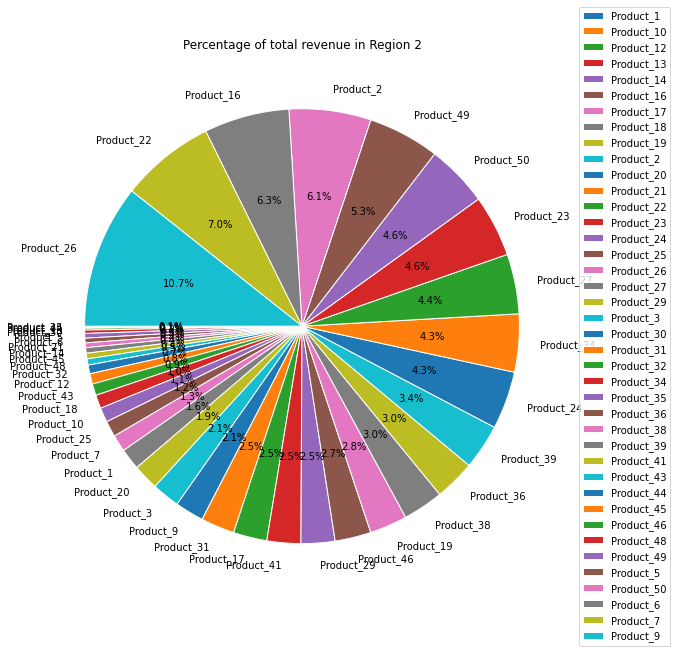

In [251]:
Total_revenue_2 = region_2.groupby('Product')['revenue'].sum()
Total_revenue_2
plt.figure(figsize=(16, 10), facecolor='white')
plt.pie((Total_revenue_2.sort_values()).values,labels=(Total_revenue_2.sort_values()).index, 
        autopct='%0.1f%%', startangle=180,wedgeprops={'linewidth': 1, 'edgecolor': 'white'})
plt.legend(labels=Total_revenue_2.index, loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Percentage of total revenue in Region 2')
plt.show()

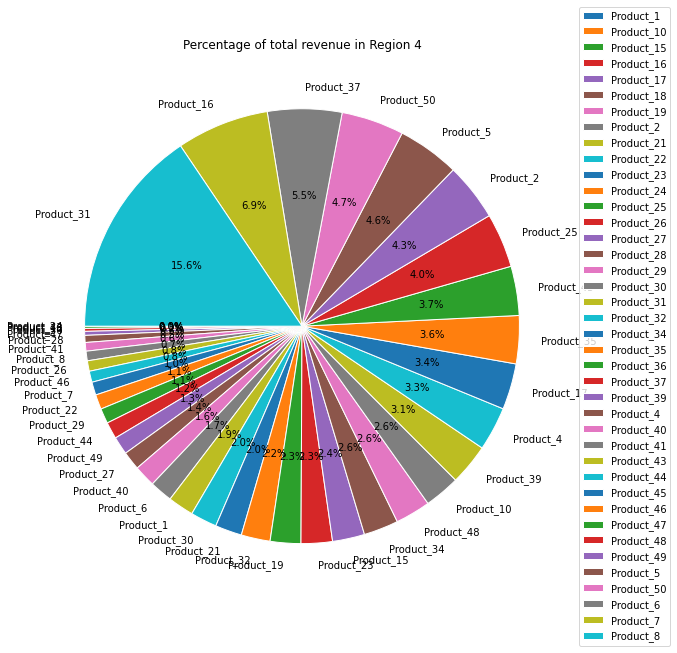

In [252]:
Total_revenue_4 = region_4.groupby('Product')['revenue'].sum()
Total_revenue_4
plt.figure(figsize=(16, 10), facecolor='white')
plt.pie((Total_revenue_4.sort_values()).values,labels=(Total_revenue_4.sort_values()).index, 
        autopct='%0.1f%%', startangle=180,wedgeprops={'linewidth': 1, 'edgecolor': 'white'})
plt.legend(labels=Total_revenue_4.index, loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Percentage of total revenue in Region 4')
plt.show()

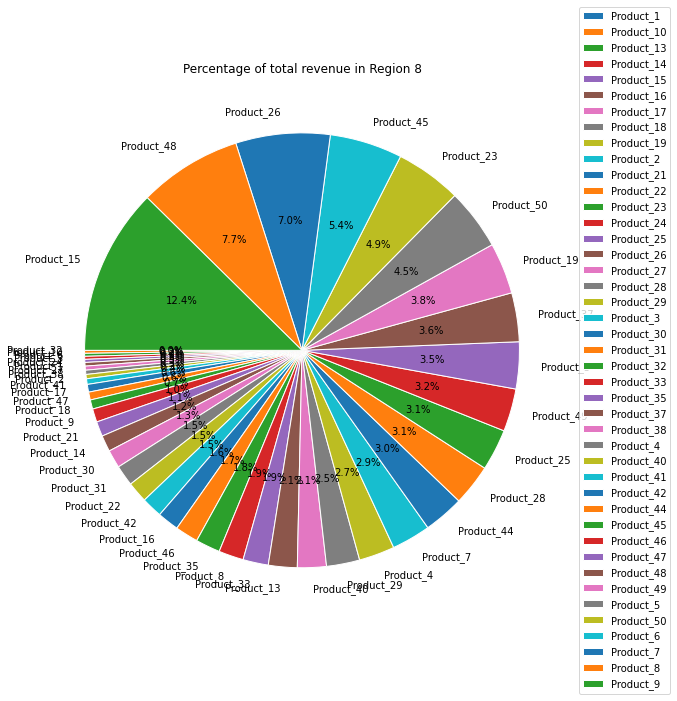

In [253]:
Total_revenue_8 = region_8.groupby('Product')['revenue'].sum()
Total_revenue_8
plt.figure(figsize=(16, 10), facecolor='white')
plt.pie((Total_revenue_8.sort_values()).values,labels=(Total_revenue_8.sort_values()).index, 
        autopct='%0.1f%%', startangle=180,wedgeprops={'linewidth': 1, 'edgecolor': 'white'})
plt.legend(labels=Total_revenue_8.index, loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Percentage of total revenue in Region 8')
plt.show()

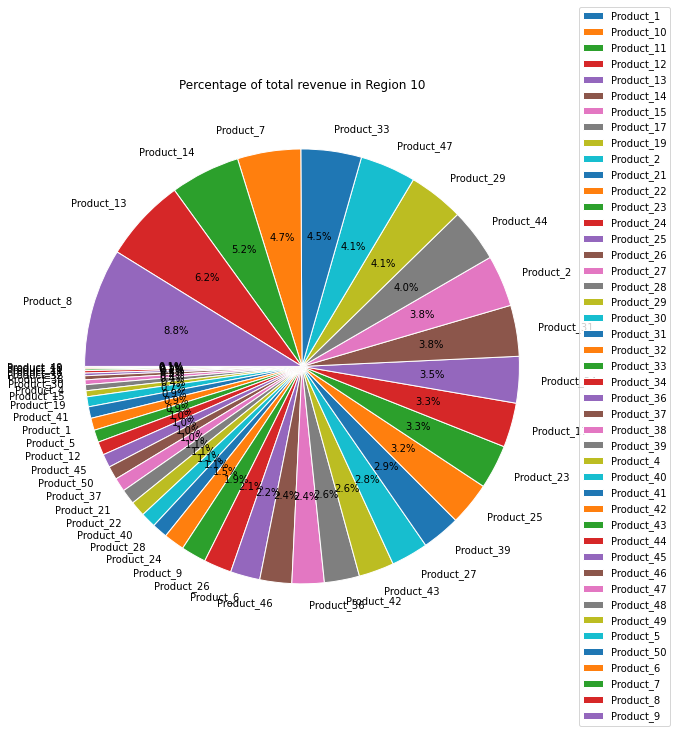

In [254]:
Total_revenue_10 = region_10.groupby('Product')['revenue'].sum()
Total_revenue_10
plt.figure(figsize=(16, 10), facecolor='white')
plt.pie((Total_revenue_10.sort_values()).values,labels=(Total_revenue_10.sort_values()).index, 
        autopct='%0.1f%%', startangle=180,wedgeprops={'linewidth': 1, 'edgecolor': 'white'})
plt.legend(labels=Total_revenue_10.index, loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Percentage of total revenue in Region 10')
plt.show()

In [235]:
Total = df.groupby('Product')['Units Sold'].sum()
unit_product = ['Product',Total]
unit_product

['Product',
 Product
 Product_1     160.000000
 Product_10    129.090791
 Product_11    110.272374
 Product_12     61.000000
 Product_13    226.181582
 Product_14    157.181582
 Product_15    134.090791
 Product_16    171.000000
 Product_17    165.090791
 Product_18    125.181582
 Product_19    171.000000
 Product_2     171.181582
 Product_20     98.181582
 Product_21    153.272374
 Product_22    108.272374
 Product_23    161.181582
 Product_24    122.000000
 Product_25    160.090791
 Product_26    113.000000
 Product_27    145.181582
 Product_28    116.090791
 Product_29    164.181582
 Product_3      83.000000
 Product_30    198.453956
 Product_31    209.000000
 Product_32     85.000000
 Product_33    175.090791
 Product_34    142.090791
 Product_35    137.090791
 Product_36     99.181582
 Product_37    156.090791
 Product_38    103.181582
 Product_39    118.090791
 Product_4     196.090791
 Product_40    153.181582
 Product_41    142.000000
 Product_42    129.272374
 Product_43    19

1) What conclusions can you draw about sales performance of various products and regions?

2) What recommendations do you have for the business?

3) Describe your data cleaning approach. How and why did you decide on which cleaning techniques to use?